# Libraries for Neural Networks - PyTorch



In [ ]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

## Loading the dataset

In [ ]:
import torch
torch.__version__

'1.5.0+cu101'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn

In [ ]:
breast = datasets.load_breast_cancer()

In [ ]:
breast.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
breast.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
breast.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
inputs = breast.data
inputs.shape

(569, 30)

In [ ]:
outputs = breast.target
outputs.shape

(569,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.25)

In [ ]:
X_train.shape

(426, 30)

In [ ]:
X_test.shape

(143, 30)

## Data transformation


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [ ]:
type(X_train)

torch.Tensor

In [ ]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [ ]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure

In [ ]:
(30 + 1) / 2

15.5

In [ ]:
# 30 -> 16 -> 16 -> 1
network = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())

In [ ]:
network.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [ ]:
loss_function = nn.BCELoss()

In [ ]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)

In [ ]:
epochs = 100
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    inputs, outputs = data
    #print(inputs)
    #print('-----')
    #print(outputs)
    optimizer.zero_grad()

    predictions = network.forward(inputs)
    loss = loss_function(predictions, outputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(running_loss / len(train_loader)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch: 1 loss: 0.6989284573599349
Epoch: 2 loss: 0.6682969539664513
Epoch: 3 loss: 0.6501532959383588
Epoch: 4 loss: 0.6364767010821852
Epoch: 5 loss: 0.6225594975227533
Epoch: 6 loss: 0.6051911829515945
Epoch: 7 loss: 0.5857381626617076
Epoch: 8 loss: 0.562668630550074
Epoch: 9 loss: 0.5383974500866824
Epoch: 10 loss: 0.5090919344924217
Epoch: 11 loss: 0.4834531947623852
Epoch: 12 loss: 0.4538949346819589
Epoch: 13 loss: 0.4228789487550425
Epoch: 14 loss: 0.40242734066275665
Epoch: 15 loss: 0.3766496534957442
Epoch: 16 loss: 0.35530585397121517
Epoch: 17 loss: 0.33506373714569004
Epoch: 18 loss: 0.3294234736714252
Epoch: 19 loss: 0.3160991301370222
Epoch: 20 loss: 0.2975823886172716
Epoch: 21 loss: 0.30123978264110035
Epoch: 22 loss: 0.28023597008960194
Epoch: 23 loss: 0.2733264047392579
Epoch: 24 loss: 0.2720096440509308
Epoch: 25 loss: 0.27414476854163544
Epoch: 26 loss: 0.2689920351948849
Epoch: 27 loss: 0.26759347025045127
Epoch: 28 loss: 0.2643312501699425
Epoch: 29 loss: 0.25344

## Evaluate

In [ ]:
network.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
X_test.shape

(143, 30)

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

torch.Tensor

In [ ]:
predictions = network.forward(X_test)
predictions

tensor([[0.9650],
        [0.6096],
        [0.9650],
        [0.9649],
        [0.9414],
        [0.0176],
        [0.0102],
        [0.8942],
        [0.9650],
        [0.9633],
        [0.9231],
        [0.9645],
        [0.9650],
        [0.0102],
        [0.9650],
        [0.9650],
        [0.9650],
        [0.9650],
        [0.9638],
        [0.0102],
        [0.9650],
        [0.7554],
        [0.0102],
        [0.9633],
        [0.8914],
        [0.9650],
        [0.5715],
        [0.0664],
        [0.0102],
        [0.6698],
        [0.8410],
        [0.9650],
        [0.9650],
        [0.9649],
        [0.9650],
        [0.9649],
        [0.9650],
        [0.9648],
        [0.0212],
        [0.9650],
        [0.9650],
        [0.9650],
        [0.0102],
        [0.9645],
        [0.9650],
        [0.0102],
        [0.9649],
        [0.9649],
        [0.9650],
        [0.9650],
        [0.9650],
        [0.9504],
        [0.9644],
        [0.9650],
        [0.5658],
        [0

In [ ]:
predictions = np.array(predictions > 0.5)
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [ ]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
accuracy_score(y_test, predictions)

0.916083916083916

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

array([[35, 11],
       [ 1, 96]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


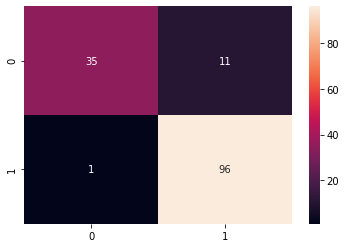

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)